In [307]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [308]:
city = pd.read_csv('dataClean/city_attributes.csv', sep=',')
city = city.drop(['City', 'Country'], 1)
cityDF = city
city = city.values.tolist()

In [309]:
map = folium.Map(location=[37.296933,-50], zoom_start=3, TileLayer="Mapbox bright")

for coordinates in city:
    folium.CircleMarker(location=coordinates, radius = 6, fill_color="green", color="gray", fill_opacity = 0.9).add_to(map)

map.save("map1.html")

In [310]:
X = cityDF.values
X = np.radians(X)
X[:10]

array([[ 0.85956872, -2.14883784],
       [ 0.79453407, -2.14110374],
       [ 0.65929689, -2.13662191],
       [ 0.83088509, -2.13509738],
       [ 0.59432355, -2.06374159],
       [ 0.57099019, -2.04477988],
       [ 0.63137232, -2.00952362],
       [ 0.58378436, -1.95606106],
       [ 0.6123399 , -1.86141351],
       [ 0.69357903, -1.83232873]])

In [311]:
model = NearestNeighbors(n_neighbors=2, algorithm='ball_tree', metric='haversine')
model.fit(X)

NearestNeighbors(algorithm='ball_tree', metric='haversine', n_neighbors=2)

In [312]:
dist, _ = model.kneighbors(X, n_neighbors=2, return_distance=True)

In [313]:
dist.shape

(36, 2)

In [314]:
dist = dist[:, -1]

In [315]:
dist = np.sort(dist)

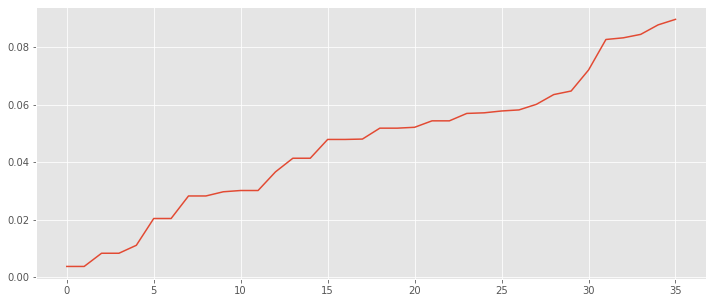

In [316]:
plt.plot(dist)

In [317]:
eps = 0.01

In [318]:
dbscan = DBSCAN(eps=eps, min_samples=20, metric='haversine', algorithm='ball_tree')
dbscan.fit(X)

DBSCAN(algorithm='ball_tree', eps=0.01, metric='haversine', min_samples=20)

In [319]:
labels = dbscan.labels_

In [320]:
pd.Series(labels).value_counts()

-1    36
dtype: int64

In [321]:
idx = labels!=-1
print(idx)
map = folium.Map(location=[37.296933,-50], zoom_start=3, TileLayer="Mapbox bright")

for coordinates in city:
    folium.CircleMarker(location=coordinates, radius = 6, fill_color="green", color="gray", fill_opacity = 0.9).add_to(map)

map.save("map2.html")

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
